In [13]:
import os
import tarfile
from six.moves import urllib

In [14]:
DEVELOPERS_SALARY_2021_PATH = os.path.join("datasets", "salaries")
DEVELOPERS_URL = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip"

In [15]:
# Automating the process of fetching the housing data

#def fetch_salary_data(developers_url = DEVELOPERS_URL, developers_path = DEVELOPERS_SALARY_2021_PATH):
#    if not os.path.isdir(developers_path):
#        os.makedirs(developers_path)
    
 #   tgz_path = os.path.join(developers_path, "stack-overflow-developer-survey-2021.tgz")
 #    developers_tgz = tarfile.open(tgz_path)
#    developers_tgz.extractall(path = developers_path)
#    developers_tgz.close()

#fetch_salary_data()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/salaries/survey_results_public_2019.csv")

In [17]:
df.head()
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [18]:
df = df[["Country","EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df= df.rename({"ConvertedComp": "Salary"}, axis =1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom,Primary/elementary school,NaN,"Not employed, and not looking for work",NaN
1,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,"Not employed, but looking for work",NaN
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0
4,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)",9,Employed full-time,NaN


In [19]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0
9,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",10,Employed full-time,13293.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55823 entries, 2 to 88330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       55823 non-null  object 
 1   EdLevel       54992 non-null  object 
 2   YearsCodePro  55657 non-null  object 
 3   Employment    55685 non-null  object 
 4   Salary        55823 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.6+ MB


In [21]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54703 entries, 2 to 88330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       54703 non-null  object 
 1   EdLevel       54703 non-null  object 
 2   YearsCodePro  54703 non-null  object 
 3   Employment    54703 non-null  object 
 4   Salary        54703 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [23]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0
9,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",10,Employed full-time,13293.0


In [24]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis =1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48248 entries, 2 to 88330
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48248 non-null  object 
 1   EdLevel       48248 non-null  object 
 2   YearsCodePro  48248 non-null  object 
 3   Salary        48248 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [25]:
df["Country"] = df["Country"].apply(lambda x: x.replace("United States", "United States of America"))

df["Country"].value_counts()

United States of America    13878
India                        3635
United Kingdom               3555
Germany                      3075
Canada                       1943
                            ...  
Togo                            1
Timor-Leste                     1
Brunei Darussalam               1
Liechtenstein                   1
Andorra                         1
Name: Country, Length: 156, dtype: int64

In [26]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    
    return categorical_map

In [27]:
country_map = shorten_categories(df.Country.value_counts(), 400)  

df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

United States of America    13878
Other                       10698
India                        3635
United Kingdom               3555
Germany                      3075
Canada                       1943
France                       1435
Brazil                       1178
Australia                    1079
Spain                        1058
Poland                        983
Russian Federation            946
Netherlands                   940
Sweden                        804
Italy                         795
Israel                        496
Switzerland                   478
Turkey                        433
Ukraine                       430
Belgium                       409
Name: Country, dtype: int64

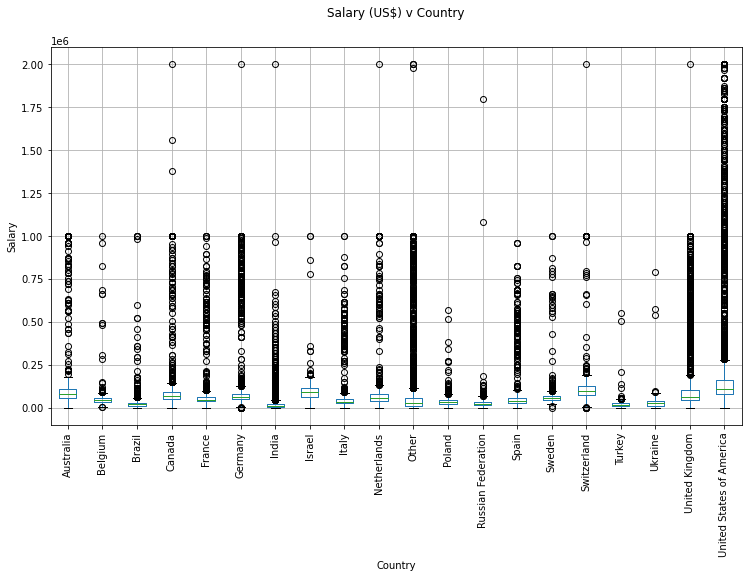

In [28]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [29]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

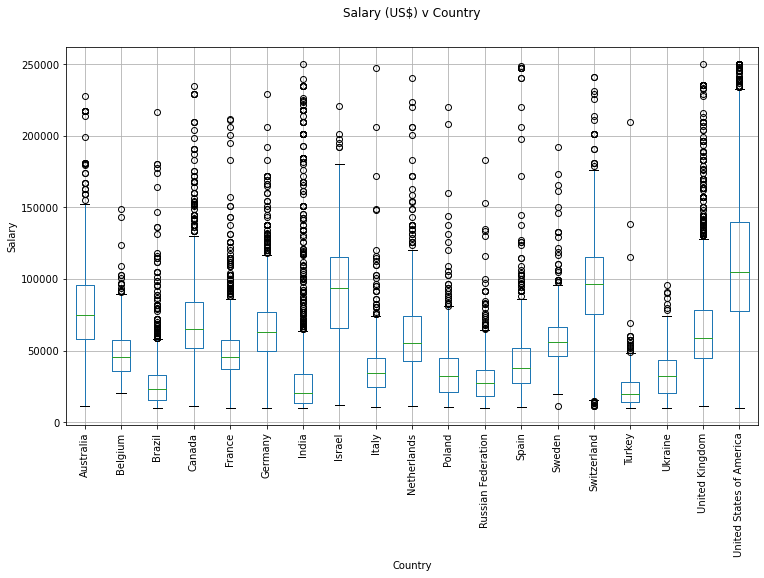

In [30]:
fig, ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [31]:
df["YearsCodePro"].unique()

array(['Less than 1 year', '10', '8', '2', '3', '13', '18', '1', '14',
       '23', '19', '35', '20', '9', '25', '7', '5', '27', '6', '48', '4',
       '31', '11', '12', '17', '16', '15', '29', '26', '30', '33', '21',
       '37', '28', '22', '40', '34', '24', '32', '38', '44', '36', '43',
       '41', '42', '39', '45', '47', 'More than 50 years', '50', '49'],
      dtype=object)

In [32]:
def clean_experience(x):
    if x == "More than 50 years":
        return 51
    if x == "Less than 1 year":
        return 0.5
    return float(x)


df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [33]:
df.YearsCodePro.unique()

array([ 0.5, 10. ,  8. ,  2. ,  3. , 13. , 18. ,  1. , 14. , 23. , 19. ,
       35. , 20. ,  9. , 25. ,  7. ,  5. , 27. ,  6. , 48. ,  4. , 31. ,
       11. , 12. , 17. , 16. , 15. , 29. , 26. , 30. , 33. , 21. , 37. ,
       28. , 22. , 40. , 34. , 24. , 32. , 38. , 44. , 36. , 43. , 41. ,
       42. , 39. , 45. , 47. , 51. , 50. , 49. ])

In [34]:
df.EdLevel.unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Primary/elementary school',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'], dtype=object)

In [35]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x or "doctoral degree" in x:
        return "Post grad"
    return "Less than a Bachelor's"

df["EdLevel"] = df["EdLevel"].apply(clean_education)

df.EdLevel.unique()

array(["Bachelor's degree", "Master's degree", 'Post grad',
       "Less than a Bachelor's"], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()

df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df.EdLevel.unique()

array([0, 2, 3, 1])

In [37]:
le_country = LabelEncoder()

df["Country"] = le_country.fit_transform(df["Country"])
df.Country.unique()

array([18,  6,  5,  0, 11,  2,  7, 14, 12, 10,  4,  9, 17,  3, 13,  8, 15,
       16,  1])

In [38]:
X = df.drop("Salary", axis = 1)
y = df["Salary"]

In [39]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X, y.values)

LinearRegression()

In [40]:
y_pred = linear_reg.predict(X)

In [41]:
from sklearn.metrics  import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))

In [42]:
error

39435.533029853716

In [43]:
import pickle

data = {"model": linear_reg, "le_country": le_country, "le_education": le_education,}

with open("saved_steps_linear_regression_2019.pkl", "wb") as file:
    pickle.dump(data, file)

In [44]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X, y.values)


DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = dec_tree_reg.predict(X)

In [46]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [47]:
error

30737.585699852567

In [48]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state = 0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [49]:
y_pred = random_forest_reg.predict(X)

In [50]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [51]:
error

30784.96962750493

In [52]:
import pickle

data = {"model": random_forest_reg, "le_country": le_country, "le_education": le_education,}

with open("saved_steps_random_forest_2019.pkl", "wb") as file:
    pickle.dump(data, file)

In [53]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring = "neg_mean_squared_error")
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [54]:
regressor = gs.best_estimator_
regressor.fit(X, y.values)

y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
error

31120.914159670807

In [55]:
X = np.array([["United States of America", "Master's degree", 15]])

In [56]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])

X = X.astype(float)
X

array([[18.,  2., 15.]])

In [57]:
y_pred = regressor.predict(X)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139056.10465116])

In [58]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education,}

with open("saved_steps_2019.pkl", "wb") as file:
    pickle.dump(data, file)
    

In [59]:
with open("saved_steps_2019.pkl", "rb") as file:
    data = pickle.load(file)


regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [60]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139056.10465116])